# **Total Spent on Healthcare per State on Brazil Analysis**

This analysis was built based on the first module of my postgraduation course on Data Analytics.
The idea was to investigate and search for real-life data and show it in charts in a good way.

In [ ]:
# Importing libs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.dates as mdates

# Adjusting the number format due to huge numbers and ugly standard format
pd.options.display.float_format = "{:.2f}".format

In [ ]:
# Creating the dict to have states and their regions to later classify the states
regions = {'Acre': 'Norte',
           'Alagoas': 'Nordeste',
           'Amapá': 'Norte',
           'Amazonas': 'Norte',
           'Bahia': 'Nordeste',
           'Ceará': 'Nordeste',
           'Distrito Federal': 'Centro-Oeste',
           'Espírito Santo': 'Sudeste',
           'Goiás': 'Centro-Oeste',
           'Maranhão': 'Nordeste',
           'Mato Grosso': 'Centro-Oeste',
           'Mato Grosso do Sul': 'Centro-Oeste',
           'Minas Gerais': 'Sudeste',
           'Pará': 'Norte',
           'Paraíba': 'Nordeste',
           'Paraná': 'Sul',
           'Pernambuco': 'Nordeste',
           'Piauí': 'Nordeste',
           'Rio de Janeiro': 'Sudeste',
           'Rio Grande do Norte': 'Nordeste',
           'Rio Grande do Sul': 'Sul',
           'Rondônia': 'Norte',
           'Roraima': 'Norte',
           'Santa Catarina': 'Sul',
           'São Paulo': 'Sudeste',
           'Sergipe': 'Nordeste',
           'Tocantins': 'Norte'
           }


In [ ]:
# Importing the data
data = pd.read_csv('/content/sih_cnv_qiuf131418177_39_99_228.csv',
                    encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=12, thousands=".", decimal=",")

# Deleting Total column, so the it will not mass with our analysis
del data['Total']
data

<ipython-input-158-9e04475c035e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/content/sih_cnv_qiuf131418177_39_99_228.csv',


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11273846.83,12443977.87,13054654.77,11275964.10,12083864.41,11556924.60,10276690.49,12334659.97,10561858.71,9729551.00
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,4308072.76,4092197.71,-
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,22198453.04,24809424.63,25005360.86,17522338.72,19666174.84,18823192.99,14608798.57,15832871.15,20050158.15,21880261.55
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,2654012.71
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,45951158.29,54114992.86,50157844.79,51289069.37,50852598.69,55848595.60,56035364.16,48106384.61,48942117.39,49145936.67
5,16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,3497928.26,5812495.72,3503666.51,3218091.37,3361503.59,3159644.32,4021077.83,3961035.17,4339815.79,3580261.72
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,9213748.90,8917570.89,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9154050.66,9452773.83,9249598.35
7,21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,38585635.17,41505279.92,39522657.84,41622528.35,40086614.28,43678124.73,41781056.06,41094291.38,38159826.75,42508414.22
8,22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,22927380.71,23012661.22,22561338.38,24604607.40,22561682.28,23220140.98,21679394.17,21718424.25,20112288.49,20715282.50
9,23 Ceará,15539821.90,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.90,...,63421142.25,64067527.80,63978316.10,64111417.85,66979655.16,66992429.23,63681448.25,65680383.20,61690778.09,64220112.03


In [ ]:
# Replacing dashes
data['2024/Mar'] = data['2024/Mar'].replace('-', 0).astype(float)
data['2009/Set'] = data['2009/Set'].replace('-', 0).astype(float)

In [ ]:
# Taking a look into null values and columns dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 195 entries, Unidade da Federação to 2024/Mar
dtypes: float64(194), object(1)
memory usage: 41.3+ KB


In [ ]:
# Getting an statisc overview
data.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,15126846.64,22710158.12,24594187.35,25431957.83,26511245.91,27858576.43,28332973.51,27800320.31,27887505.26,27148854.29,...,64221319.62,66200620.27,67805435.57,65207966.54,66981618.78,65880250.73,65928471.53,66595503.83,65036491.57,68681492.00
std,19159188.30,30879444.07,32516725.69,33339066.25,37540771.63,38676893.04,39292968.91,37748913.80,38226540.65,36671387.56,...,82197750.78,82158091.40,85927701.48,81385175.34,83360679.98,80795201.68,82729890.18,83755586.73,83697880.59,89890521.14
min,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3497928.26,4040988.99,3503666.51,1679849.33,2443674.72,3159644.32,2077360.03,2164371.02,2040590.11,0.00
25%,4740724.30,7060731.59,8041439.31,8526744.11,8531522.65,9272741.85,9266086.50,9297840.75,9207727.12,9083121.19,...,20651151.88,21553565.50,21790387.23,19276040.80,20487227.62,19638457.70,18049444.50,18372670.68,19437614.21,20380230.09
50%,7985142.43,10079928.25,10352238.59,11253833.56,12215107.11,12850125.67,12755413.77,12872578.37,12727433.30,12768727.85,...,32825468.35,30194794.18,32466356.08,31610313.47,30213039.18,31095681.86,35814732.06,33702199.13,36015146.29,40911095.71
75%,17684828.78,25693265.33,29357964.23,32741327.52,31376220.41,31755745.04,31805516.06,33353946.49,32015490.68,31268675.55,...,85624377.95,85589255.60,91960488.42,86063261.25,91223977.72,88804069.62,89106757.59,91329183.81,88566693.70,94263645.25
max,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,388463566.83,385876245.99,405373298.78,379263745.60,387813091.33,372701982.57,384779491.09,391105966.62,393303340.45,426405446.29


In [ ]:
# Getting the mean
data.mean(numeric_only=True)

2008/Jan   15126846.64
2008/Fev   22710158.12
2008/Mar   24594187.35
2008/Abr   25431957.83
2008/Mai   26511245.91
               ...    
2023/Nov   65880250.73
2023/Dez   65928471.53
2024/Jan   66595503.83
2024/Fev   65036491.57
2024/Mar   68681492.00
Length: 194, dtype: float64

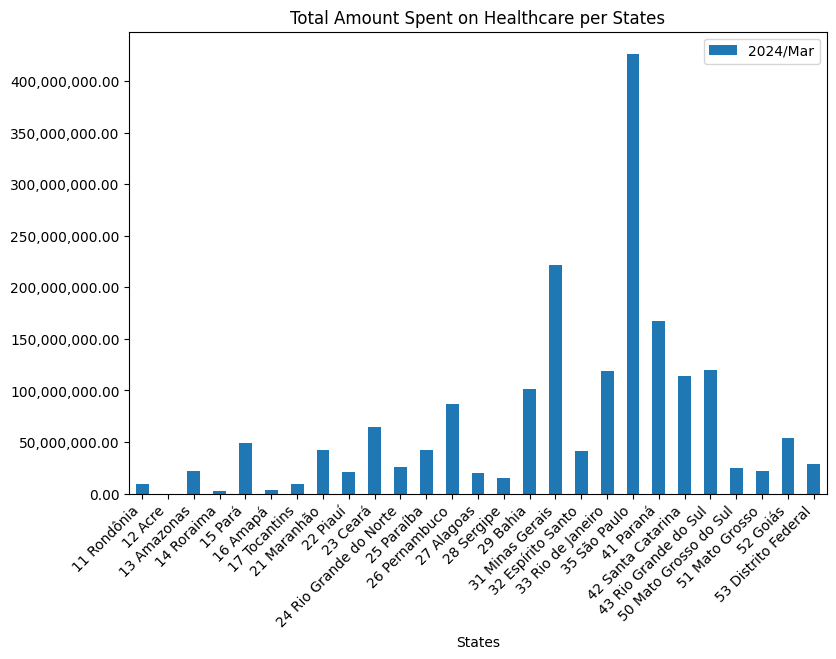

In [ ]:
# Ploting the first chart
axis = data.plot(x="Unidade da Federação", y="2024/Mar", kind="bar", figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

axis.set_xlabel('States')
plt.title("Total Amount Spent on Healthcare per States")
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# Getting only the months/years with numbers on their cells
col_to_use = data.mean(numeric_only=True).index.tolist()
col_to_use.insert(0, "Unidade da Federação")

In [ ]:
# Adjusting the dataframe with only months/years with numbers and getting the regions
data_to_use = data[col_to_use]
data_to_use['Unidade da Federação'] = data_to_use['Unidade da Federação'].apply(lambda x: x[3:])
data_to_use['Região'] = data_to_use['Unidade da Federação'].apply(lambda est: regions[est])
data_to_use = data_to_use.set_index('Unidade da Federação')
data_to_use

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,12443977.87,13054654.77,11275964.10,12083864.41,11556924.60,10276690.49,12334659.97,10561858.71,9729551.00,Norte
Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,4308072.76,4092197.71,0.00,Norte
Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,24809424.63,25005360.86,17522338.72,19666174.84,18823192.99,14608798.57,15832871.15,20050158.15,21880261.55,Norte
Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,4040988.99,4766375.31,1679849.33,2443674.72,3795465.55,2077360.03,2164371.02,2040590.11,2654012.71,Norte
Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,54114992.86,50157844.79,51289069.37,50852598.69,55848595.60,56035364.16,48106384.61,48942117.39,49145936.67,Norte
Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,1866748.58,...,5812495.72,3503666.51,3218091.37,3361503.59,3159644.32,4021077.83,3961035.17,4339815.79,3580261.72,Norte
Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,...,8917570.89,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9154050.66,9452773.83,9249598.35,Norte
Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,16072219.28,...,41505279.92,39522657.84,41622528.35,40086614.28,43678124.73,41781056.06,41094291.38,38159826.75,42508414.22,Nordeste
Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,11715943.38,...,23012661.22,22561338.38,24604607.40,22561682.28,23220140.98,21679394.17,21718424.25,20112288.49,20715282.50,Nordeste


In [ ]:
# Plotting line chart for time series

def show_line_chart(df):
    axis = df.T[:-2].plot(figsize=(12,6))
    axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

    plt.title("Evolution of Total Amount Spent on Healthcare on Brazil")
    axis.set_xlabel("Date")
    axis.set_ylabel("Value")
    axis.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

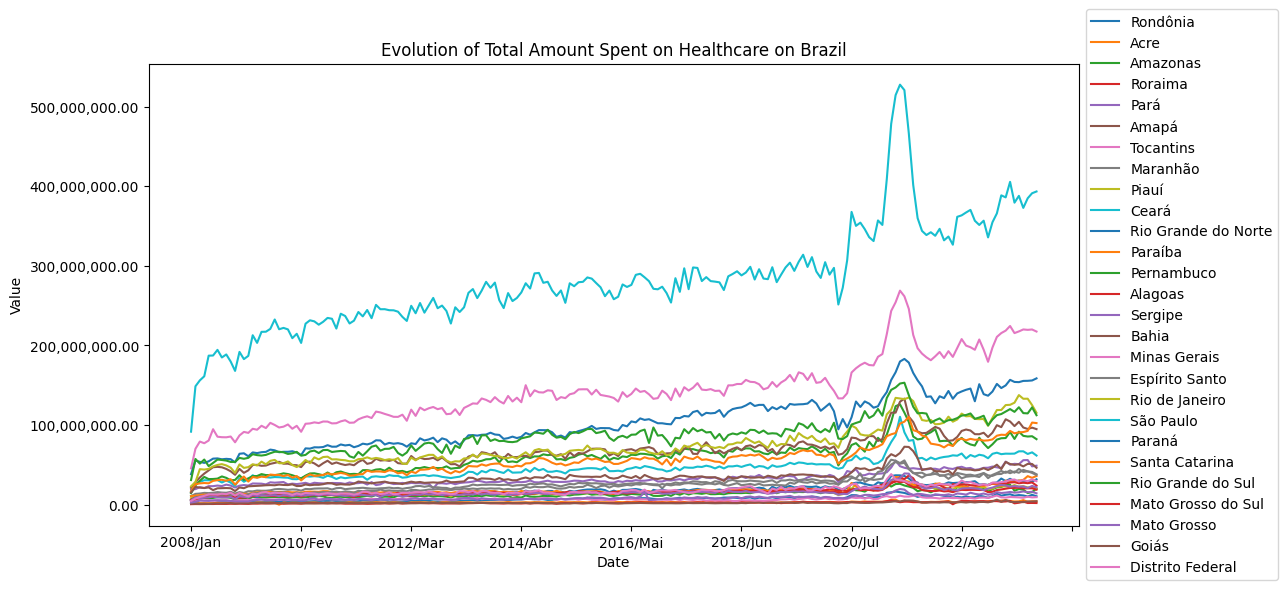

In [ ]:
show_line_chart(data_to_use)

In [ ]:
# Setting a random seed
np.random.seed(524387)

# Selecting 7 states randomly
data_to_use_7 = data_to_use.sample(n=7)

# Adding São Paulo into the list
data_to_use_7 = pd.concat([data_to_use_7, data_to_use[data_to_use.index.isin(['São Paulo'])]])

data_to_use_7

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,...,8917570.89,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9154050.66,9452773.83,9249598.35,Norte
Pernambuco,14393949.89,24181400.95,29991302.71,34806197.97,32147987.35,32239094.89,32685640.76,35457038.66,33668261.46,30579747.51,...,83642878.93,91310048.72,82544788.07,91674726.33,86424227.64,85566340.12,85933889.61,82263567.92,87299969.68,Nordeste
Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,218556887.17,224399367.99,215468564.36,217575399.42,220035109.93,219543712.09,219986691.55,217406364.73,221891681.42,Sudeste
Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,11715943.38,...,23012661.22,22561338.38,24604607.40,22561682.28,23220140.98,21679394.17,21718424.25,20112288.49,20715282.50,Nordeste
Paraíba,10723002.45,11386274.47,12053643.87,12653528.76,12215107.11,12256928.49,12755413.77,12872578.37,12558296.11,12768727.85,...,30194794.18,28924227.66,28752456.30,30213039.18,31095681.86,35814732.06,33702199.13,36015146.29,42676154.70,Nordeste
Bahia,21211522.47,28189304.95,34181483.52,39026934.13,42949566.82,47025972.04,47481695.17,46931248.28,44883379.31,41920011.46,...,107235308.96,104419594.74,98675601.96,104019485.87,96896542.50,95079794.37,96724478.01,94869819.48,101227320.82,Nordeste
Santa Catarina,16504913.45,25651429.11,26743524.89,27181488.26,26845308.18,29909762.04,30789135.84,31250854.33,30019676.93,31957603.59,...,87535632.27,92610928.13,89581734.43,90773229.10,91183911.60,92647175.05,103102249.03,102459196.74,113806213.76,Sul
São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,385876245.99,405373298.78,379263745.60,387813091.33,372701982.57,384779491.09,391105966.62,393303340.45,426405446.29,Sudeste


<Axes: >

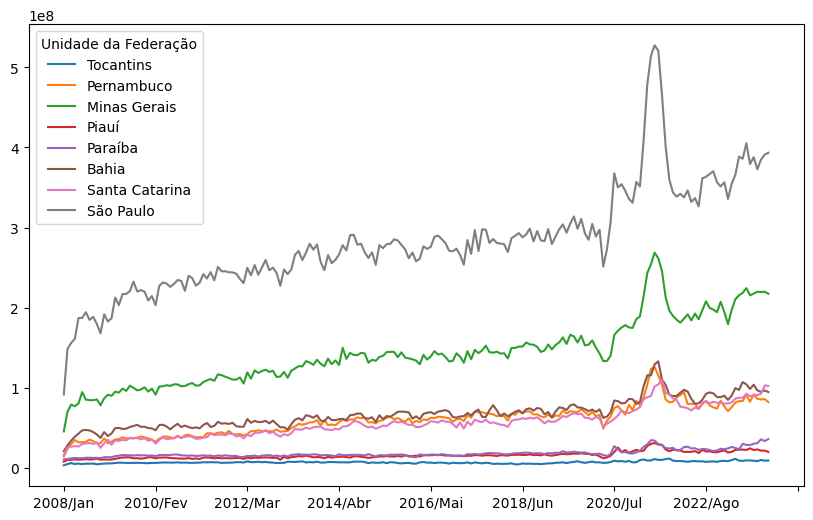

In [ ]:
# Plotting for these states
data_to_use_7.T[:-2].plot(figsize=(10,6))

In [ ]:
# Creating the total columns
data_to_use_7["Total"] = data_to_use_7.sum(axis = 1,numeric_only=True)
data_to_use_7.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,Região,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,...,9627055.69,9418896.52,9147983.05,8620368.58,10074761.74,9154050.66,9452773.83,9249598.35,Norte,1382979696.26
Pernambuco,14393949.89,24181400.95,29991302.71,34806197.97,32147987.35,32239094.89,32685640.76,35457038.66,33668261.46,30579747.51,...,91310048.72,82544788.07,91674726.33,86424227.64,85566340.12,85933889.61,82263567.92,87299969.68,Nordeste,11642246515.52
Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,224399367.99,215468564.36,217575399.42,220035109.93,219543712.09,219986691.55,217406364.73,221891681.42,Sudeste,27814865996.96
Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,11715943.38,...,22561338.38,24604607.40,22561682.28,23220140.98,21679394.17,21718424.25,20112288.49,20715282.50,Nordeste,3074813630.71
Paraíba,10723002.45,11386274.47,12053643.87,12653528.76,12215107.11,12256928.49,12755413.77,12872578.37,12558296.11,12768727.85,...,28924227.66,28752456.30,30213039.18,31095681.86,35814732.06,33702199.13,36015146.29,42676154.70,Nordeste,3573181057.85


In [ ]:
# Sorting and deleting the total column
data_to_use_7 = data_to_use_7.sort_values('Total', ascending=False)
del data_to_use_7['Total']

In [ ]:
# Grouping by one region
data_to_use_south = data_to_use[data_to_use['Região'] == 'Sul']

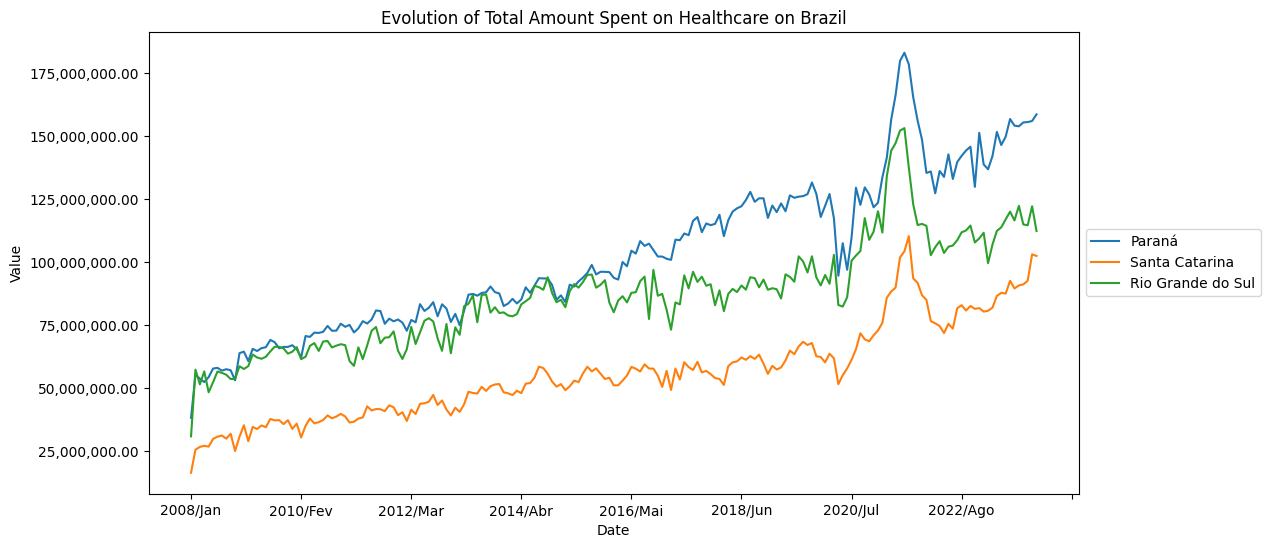

In [ ]:
# Plottting chart
show_line_chart(data_to_use_south)

### Now we will use a database with first symptoms of Dengue on Brazil to see if there is any correlation between the amount spent on healthcare and the numbers of dengue cases for South Region.

In [ ]:
# Setting the path for database with first symptoms of Dengue
dengue_path = '/content/sinannet_cnv_denguebbr135129177_39_99_228.csv'

In [ ]:
# Reding the file
data_dengue = pd.read_csv(dengue_path,
                    encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=28, thousands=".", decimal=",")

data_dengue

<ipython-input-175-7277b25bf8df>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_dengue = pd.read_csv(dengue_path,


,UF de notificação,Em Branco/ign,<1975,1975,1976,1977,1978,1979,1980,1981,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,2,23,1,2,2,3,-,3,-,...,7860,2120,544,1007,3906,2298,14252,10702,4829,51944
1,12 Acre,-,42,1,-,1,1,2,-,-,...,2257,1932,7381,10259,7501,15009,3453,7262,4971,94696
2,13 Amazonas,-,11,-,-,1,1,1,1,1,...,7445,3890,2341,4155,5839,8265,5356,6325,8516,62262
3,14 Roraima,-,3,-,-,-,-,-,-,-,...,210,282,114,1623,468,111,62,224,291,5639
4,15 Pará,-,46,3,4,3,2,2,8,6,...,10747,7789,3745,5375,3460,5082,5912,5709,17134,77672
5,16 Amapá,-,13,-,-,-,1,1,2,-,...,1842,918,767,189,61,285,290,1229,6253,17450
6,17 Tocantins,2,41,1,2,4,3,3,4,6,...,7885,4915,3095,13568,1916,9591,20854,3297,6280,83339
7,21 Maranhão,2,63,4,4,5,6,4,9,5,...,23653,7132,2132,5593,2517,1322,6849,4801,11010,76068
8,22 Piauí,-,26,-,1,-,2,1,2,2,...,5255,5289,1936,8010,2209,4001,31697,7624,11530,93125
9,23 Ceará,6,123,8,9,7,10,5,5,15,...,49635,39138,4156,16284,24035,35429,42736,14491,10892,323842


In [ ]:
# Deleting unused columns
del data_dengue['Total']
del data_dengue['Em Branco/ign']
del data_dengue['<1975']

data_dengue

,UF de notificação,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,11 Rondônia,1,2,2,3,-,3,-,2,3,...,2322,7860,2120,544,1007,3906,2298,14252,10702,4829
1,12 Acre,1,-,1,1,2,-,-,5,1,...,5861,2257,1932,7381,10259,7501,15009,3453,7262,4971
2,13 Amazonas,-,-,1,1,1,1,1,3,1,...,3649,7445,3890,2341,4155,5839,8265,5356,6325,8516
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,1098,210,282,114,1623,468,111,62,224,291
4,15 Pará,3,4,3,2,2,8,6,5,6,...,7927,10747,7789,3745,5375,3460,5082,5912,5709,17134
5,16 Amapá,-,-,-,1,1,2,-,1,1,...,3339,1842,918,767,189,61,285,290,1229,6253
6,17 Tocantins,1,2,4,3,3,4,6,-,5,...,8045,7885,4915,3095,13568,1916,9591,20854,3297,6280
7,21 Maranhão,4,4,5,6,4,9,5,4,7,...,8069,23653,7132,2132,5593,2517,1322,6849,4801,11010
8,22 Piauí,-,1,-,2,1,2,2,7,1,...,7737,5255,5289,1936,8010,2209,4001,31697,7624,11530
9,23 Ceará,8,9,7,10,5,5,15,14,8,...,63433,49635,39138,4156,16284,24035,35429,42736,14491,10892


In [ ]:
# Adjusting the state column
data_dengue['UF de notificação'] = data_dengue['UF de notificação'].apply(lambda x: x[3:])

In [ ]:
# Adding region to group by later
data_dengue['Região'] = data_dengue['UF de notificação'].apply(lambda est: regions[est])

In [ ]:
# Adjusting the index
data_dengue = data_dengue.set_index('UF de notificação')
data_dengue

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Região
UF de notificação,,,,,,,,,,,,,,,,,,,,,
Rondônia,1,2,2,3,-,3,-,2,3,2,...,7860,2120,544,1007,3906,2298,14252,10702,4829,Norte
Acre,1,-,1,1,2,-,-,5,1,3,...,2257,1932,7381,10259,7501,15009,3453,7262,4971,Norte
Amazonas,-,-,1,1,1,1,1,3,1,1,...,7445,3890,2341,4155,5839,8265,5356,6325,8516,Norte
Roraima,-,-,-,-,-,-,-,-,-,-,...,210,282,114,1623,468,111,62,224,291,Norte
Pará,3,4,3,2,2,8,6,5,6,4,...,10747,7789,3745,5375,3460,5082,5912,5709,17134,Norte
Amapá,-,-,-,1,1,2,-,1,1,1,...,1842,918,767,189,61,285,290,1229,6253,Norte
Tocantins,1,2,4,3,3,4,6,-,5,5,...,7885,4915,3095,13568,1916,9591,20854,3297,6280,Norte
Maranhão,4,4,5,6,4,9,5,4,7,2,...,23653,7132,2132,5593,2517,1322,6849,4801,11010,Nordeste
Piauí,-,1,-,2,1,2,2,7,1,2,...,5255,5289,1936,8010,2209,4001,31697,7624,11530,Nordeste


In [ ]:
# Filtering to have the same yers for both dataframes
filtered_col_dengue = filter(lambda col: int(col) > 2007, data_dengue.columns[:-2])

In [ ]:
# Transforming into list to be used
filtered_col_dengue = list(filtered_col_dengue)

In [ ]:
# Inserting the region column
filtered_col_dengue.insert(0, 'Região')

In [ ]:
# Adjusting the df with years
data_dengue = data_dengue[filtered_col_dengue]
data_dengue

,Região,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
UF de notificação,,,,,,,,,,,,,,,,,
Rondônia,Norte,1,2,4,1,3,54,1978,2322,7860,2120,544,1007,3906,2298,14252,10702
Acre,Norte,6,1,-,2,4,38,28635,5861,2257,1932,7381,10259,7501,15009,3453,7262
Amazonas,Norte,2,-,2,1,1,69,6358,3649,7445,3890,2341,4155,5839,8265,5356,6325
Roraima,Norte,-,-,1,-,-,12,1134,1098,210,282,114,1623,468,111,62,224
Pará,Norte,5,-,9,6,5,77,4506,7927,10747,7789,3745,5375,3460,5082,5912,5709
Amapá,Norte,-,-,1,2,1,9,2227,3339,1842,918,767,189,61,285,290,1229
Tocantins,Norte,2,4,4,3,2,103,3636,8045,7885,4915,3095,13568,1916,9591,20854,3297
Maranhão,Nordeste,2,1,9,12,9,30,2675,8069,23653,7132,2132,5593,2517,1322,6849,4801
Piauí,Nordeste,2,8,-,6,2,30,7672,7737,5255,5289,1936,8010,2209,4001,31697,7624


In [ ]:
# Replacing dashs
data_dengue = data_dengue.replace('-', 0)

In [ ]:
# Adjusting the numbers to umeric format
filtered_col_dengue.remove('Região')
data_dengue[filtered_col_dengue] = data_dengue[filtered_col_dengue].astype(int)

In [ ]:
# Creatinf the dataframe with only South states
data_dengue_south = data_dengue[data_dengue['Região'] == 'Sul']

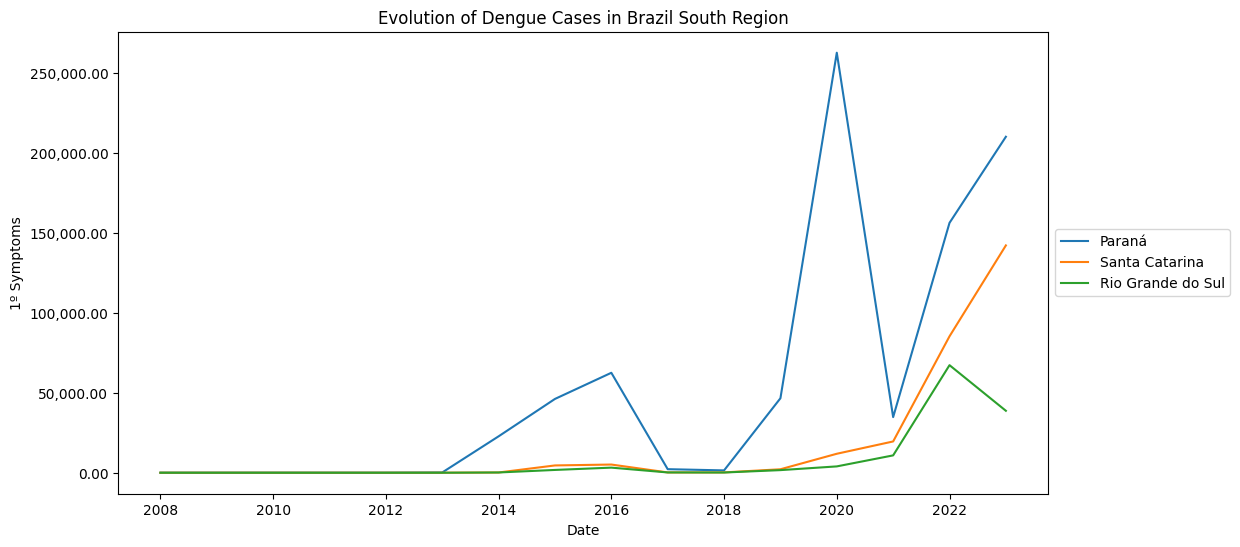

In [ ]:
axis = data_dengue_south[filtered_col_dengue].T.plot(figsize=(12,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Evolution of Dengue Cases in Brazil South Region")
axis.set_xlabel("Date")
axis.set_ylabel("1º Symptoms")
axis.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### It seems that there is no visual correlation between number os dengue cases and the amount spent on healthcare for South Region.

In [ ]:
# Adjusting the columns and rows
del data_to_use_south['Região']
data_to_use_south = data_to_use_south.T
data_to_use_south

Unidade da Federação,Paraná,Santa Catarina,Rio Grande do Sul
2008/Jan,38266347.46,16504913.45,30931325.46
2008/Fev,55384670.52,25651429.11,57363420.01
2008/Mar,53801318.85,26743524.89,51547794.07
2008/Abr,52460306.69,27181488.26,56673338.49
2008/Mai,54419620.71,26845308.18,48397733.07
...,...,...,...
2023/Nov,155409140.80,91183911.60,114962110.61
2023/Dez,155539644.48,92647175.05,114632478.21
2024/Jan,155977226.54,103102249.03,122175213.25
2024/Fev,158598211.10,102459196.74,112342301.17


In [ ]:
def translate_and_convert_dates(date_list):
    # Create a dictionary to map Portuguese month names to English month names
    month_dict = {
        "Jan": "Jan",
        "Fev": "Feb",
        "Mar": "Mar",
        "Abr": "Apr",
        "Mai": "May",
        "Jun": "Jun",
        "Jul": "Jul",
        "Ago": "Aug",
        "Set": "Sep",
        "Out": "Oct",
        "Nov": "Nov",
        "Dez": "Dec"
    }

    # Translate the month names in the date list
    translated_dates = [date.replace(date.split("/")[1], month_dict[date.split("/")[1]]) for date in date_list]

    # Convert the translated dates into a pandas datetime index
    datetime_index = pd.to_datetime(translated_dates, format="%Y/%b", errors="coerce")

    return datetime_index

In [ ]:
# Adjusting the dates
data_to_use_south.index = translate_and_convert_dates(data_to_use_south.index)

In [ ]:
# Converting the index as date

data_to_use_south.index = pd.to_datetime(data_to_use_south.index, format="%Y/%b").strftime('%Y-%m')
data_to_use_south

Unidade da Federação,Paraná,Santa Catarina,Rio Grande do Sul
2008-01,38266347.46,16504913.45,30931325.46
2008-02,55384670.52,25651429.11,57363420.01
2008-03,53801318.85,26743524.89,51547794.07
2008-04,52460306.69,27181488.26,56673338.49
2008-05,54419620.71,26845308.18,48397733.07
...,...,...,...
2023-11,155409140.80,91183911.60,114962110.61
2023-12,155539644.48,92647175.05,114632478.21
2024-01,155977226.54,103102249.03,122175213.25
2024-02,158598211.10,102459196.74,112342301.17


In [ ]:
# Creating the Year column
data_to_use_south["Ano"] = [data[:4] for data in data_to_use_south.index.to_list()]
data_to_use_south

Unidade da Federação,Paraná,Santa Catarina,Rio Grande do Sul,Ano
2008-01,38266347.46,16504913.45,30931325.46,2008
2008-02,55384670.52,25651429.11,57363420.01,2008
2008-03,53801318.85,26743524.89,51547794.07,2008
2008-04,52460306.69,27181488.26,56673338.49,2008
2008-05,54419620.71,26845308.18,48397733.07,2008
...,...,...,...,...
2023-11,155409140.80,91183911.60,114962110.61,2023
2023-12,155539644.48,92647175.05,114632478.21,2023
2024-01,155977226.54,103102249.03,122175213.25,2024
2024-02,158598211.10,102459196.74,112342301.17,2024


In [ ]:
# Grouping by the Year
data_to_use_south = data_to_use_south.groupby('Ano')[data_to_use_south.columns.drop('Ano')].sum().reset_index()

In [ ]:
# Adjusting to better plot by year
anos = data_to_use_south['Ano'].astype(str).drop_duplicates()
data_to_use_south['Ano'] = data_to_use_south['Ano'].astype(int)

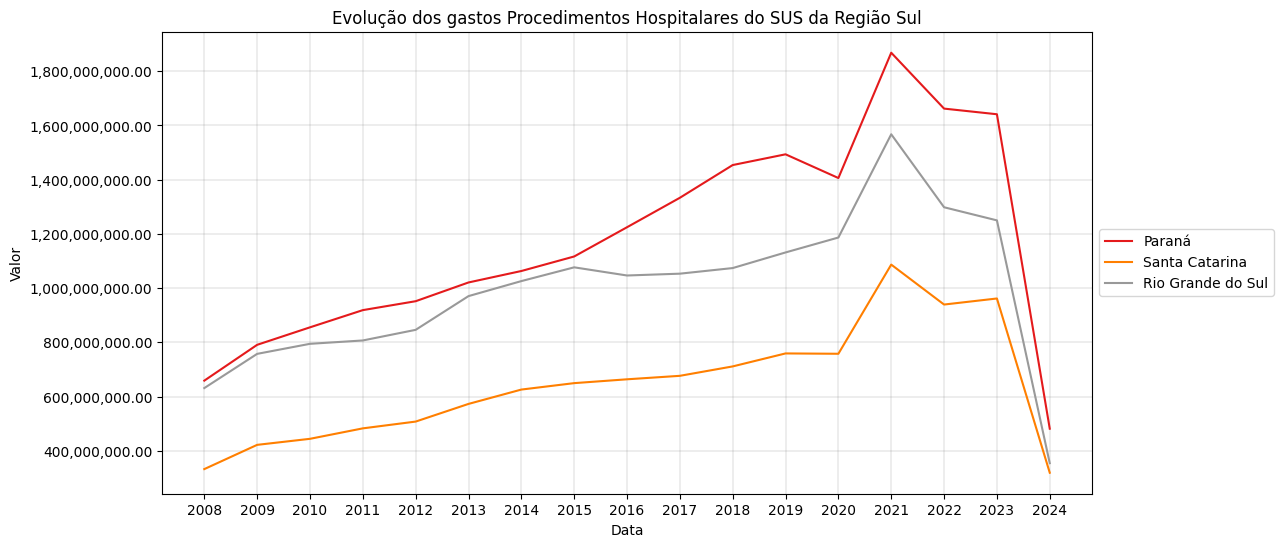

In [ ]:
axis = data_to_use_south.plot(x='Ano', y=data_to_use_south.columns.drop('Ano'), figsize=(12,6), colormap='Set1')
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))


plt.title("Evolução dos gastos Procedimentos Hospitalares do SUS da Região Sul")
plt.xticks(np.arange(min(data_to_use_south['Ano']), max(data_to_use_south['Ano'])+1, 1.0))
axis.set_xlabel("Data")
axis.set_ylabel("Valor")
axis.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(color='gray', linestyle='-', linewidth=0.2)

plt.show()

In [ ]:
# Getting the latest month on Heathcare df
latest_month = data_to_use_7.columns[-2]
latest_month

'2024/Mar'

In [ ]:
# Getting how much was spent on latest month
spent_latest_month = data_to_use_7[latest_month]
spent_latest_month.head()

Unidade da Federação
São Paulo        426405446.29
Minas Gerais     221891681.42
Bahia            101227320.82
Pernambuco        87299969.68
Santa Catarina   113806213.76
Name: 2024/Mar, dtype: float64

<Axes: xlabel='Unidade da Federação'>

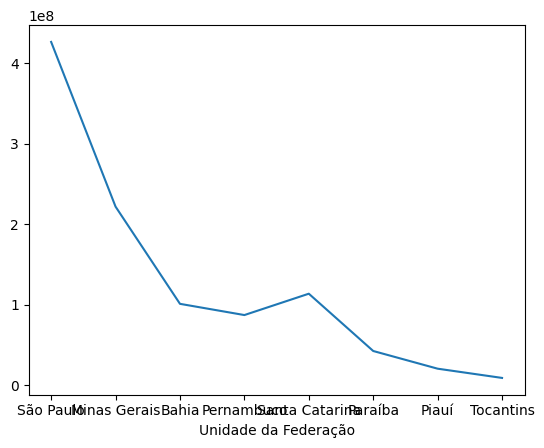

In [ ]:
spent_latest_month.plot()

<Axes: ylabel='2024/Mar'>

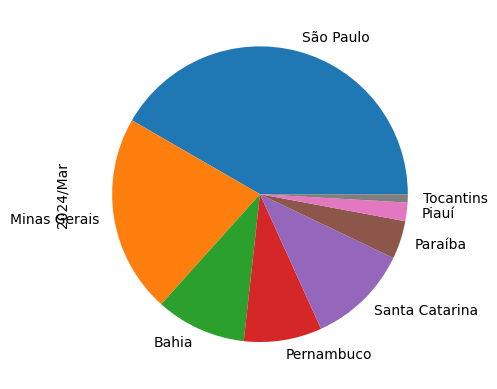

In [ ]:
spent_latest_month.plot(kind='pie')

<Axes: ylabel='2024/Mar'>

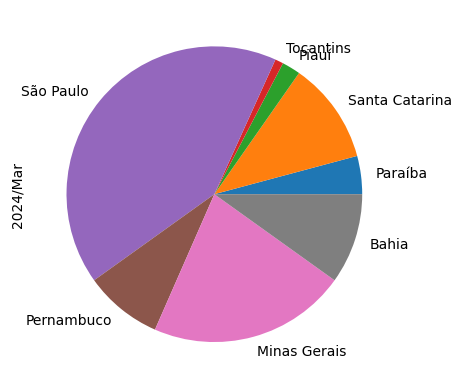

In [ ]:
spent_latest_month.sample(frac=1).plot(kind="pie")

### As you can see the line chart and pie chart doesn't provide a good visualization. The table below is the better option!

In [ ]:
spent_latest_month = spent_latest_month.sort_values(ascending=False)
spent_latest_month

Unidade da Federação
São Paulo        426405446.29
Minas Gerais     221891681.42
Santa Catarina   113806213.76
Bahia            101227320.82
Pernambuco        87299969.68
Paraíba           42676154.70
Piauí             20715282.50
Tocantins          9249598.35
Name: 2024/Mar, dtype: float64

In [ ]:
# Comparing the spent by Bahia
spent_latest_month = spent_latest_month / spent_latest_month.loc["Bahia"]

<Axes: xlabel='Unidade da Federação'>

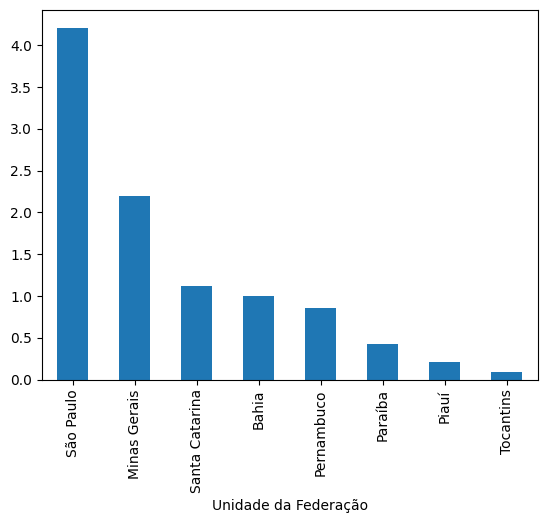

In [ ]:
spent_latest_month = spent_latest_month.sort_values(ascending=False)
spent_latest_month.plot(kind="bar")

<ipython-input-210-a76991020174>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


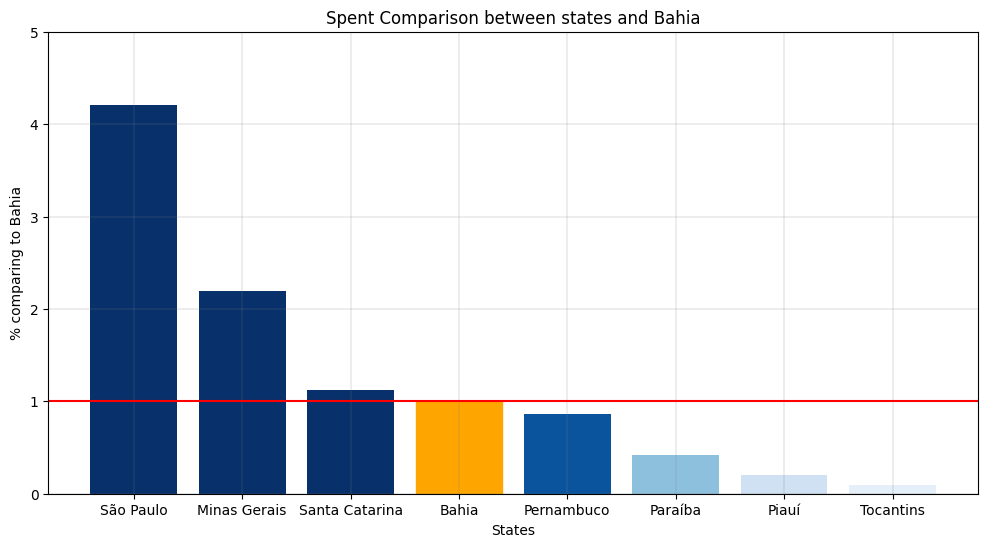

In [ ]:
# Making a better plot to compare the spent on states with Bahia
fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim(0,5)

plt.title('Spent Comparison between states and Bahia')
# Define a colormap
cmap = plt.cm.get_cmap('Blues')

ax = plt.bar(data=spent_latest_month, x=spent_latest_month.index, height=spent_latest_month.values, color=cmap(spent_latest_month.values))


plt.xlabel("States")
plt.ylabel("% comparing to Bahia")
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.axhline(y=spent_latest_month.loc['Bahia'], color='r', linestyle='-')

ax[3].set_color('Orange')

plt.show()

### Now let's see the total spent on São Paulo and Bahia on 2021, July per population.

In [ ]:
data_july_2021 = data_to_use[['2021/Jul', 'Região']]

In [ ]:
data_july_2021.rename({'2021/Jul': 'Gastos'}, axis=1, inplace=True)

<ipython-input-213-575776b3eeb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_july_2021.rename({'2021/Jul': 'Gastos'}, axis=1, inplace=True)


In [ ]:
data_july_2021 = data_july_2021.loc[['São Paulo', 'Bahia']]

In [ ]:
data_july_2021['População'] = [46649132, 14985284]

In [ ]:
data_july_2021

,Gastos,Região,População
Unidade da Federação,,,
São Paulo,520571425.10,Sudeste,46649132
Bahia,133185386.00,Nordeste,14985284


In [ ]:
del data_july_2021['Região']

In [ ]:
data_july_2021['Gastos p/ habitante'] = data_july_2021['Gastos'] / data_july_2021['População']

In [ ]:
data_july_2021

,Gastos,População,Gastos p/ habitante
Unidade da Federação,,,
São Paulo,520571425.10,46649132,11.16
Bahia,133185386.00,14985284,8.89


<Axes: xlabel='Unidade da Federação'>

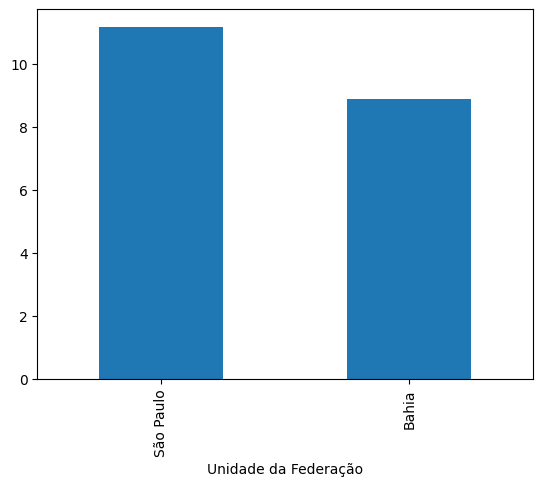

In [ ]:
data_july_2021['Gastos p/ habitante'].plot(kind='bar')

### We can see that São Paulo spent more money on healthcare on 2021, July.
### Probably it is in this way because of higher price to live in São Paulo than on Bahia. Or because the per capita income tat is higher on Brazil.